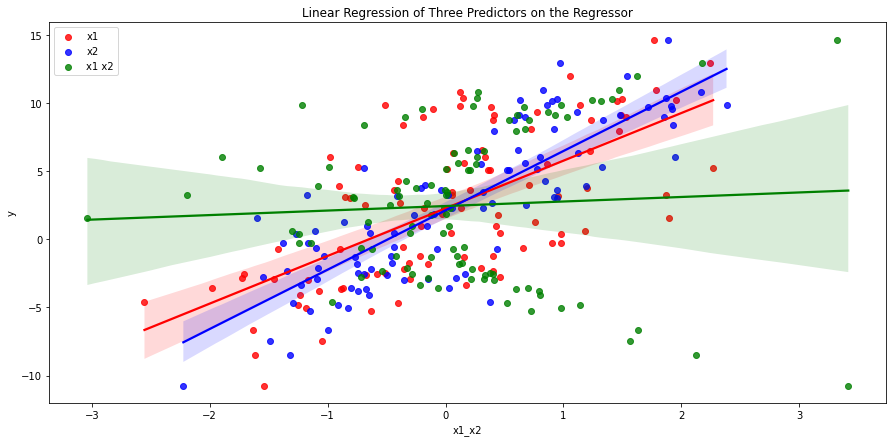

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))
sns.regplot(x='x1', y='y', data=df, ax=ax, color='red', label='x1')
sns.regplot(x='x2', y='y', data=df, ax=ax, color='blue', label='x2')
sns.regplot(x='x1_x2', y='y', data=df, ax=ax, color='green', label='x1 x2')

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

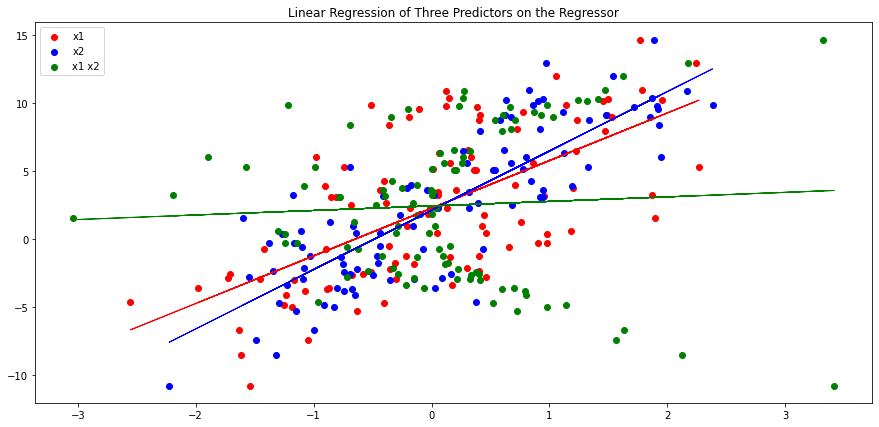

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the three linear regressions
fig, ax = plt.subplots(figsize=(15, 7))

# regression 1: x1 on y
x1 = sm.add_constant(df['x1'])
model = sm.OLS(df['y'], x1).fit()
pred = model.predict(x1)
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth=1)

# regression 2: x2 on y
x2 = sm.add_constant(df['x2'])
model = sm.OLS(df['y'], x2).fit()
pred = model.predict(x2)
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth=1)

# regression 3: x1_x2 on y
x1_x2 = sm.add_constant(df['x1_x2'])
model = sm.OLS(df['y'], x1_x2).fit()
pred = model.predict(x1_x2)
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth=1)

# add the legend and title
ax.legend()
plt.title("Linear Regression of Three Predictors on the Regressor")

plt.show()

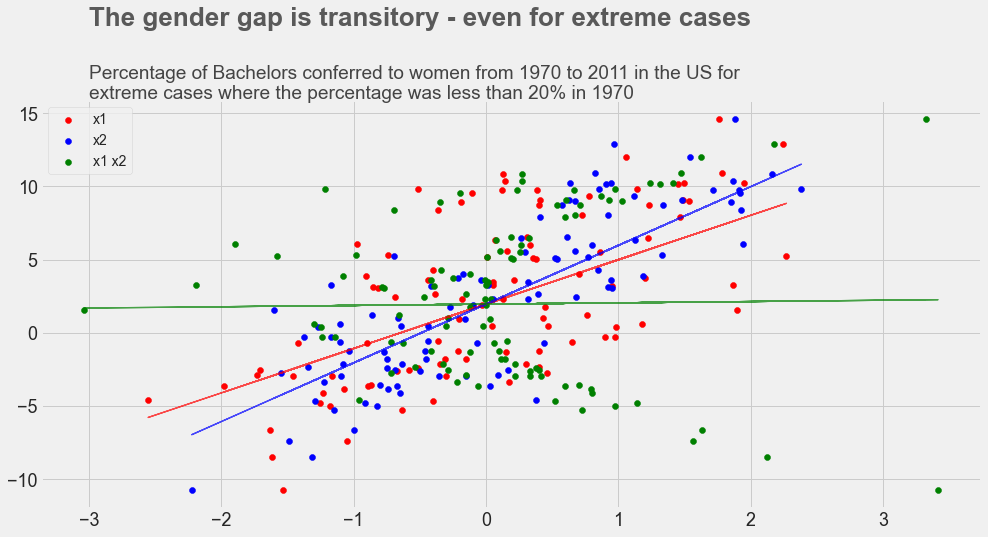

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.style as style
style.use('fivethirtyeight')

# generate example data
np.random.seed(0)
x1 = np.random.normal(0, 1, 100)
x2 = np.random.normal(0, 1, 100)
y = 2 + 3 * x1 + 4 * x2 + np.random.normal(0, 0.5, 100)
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})

# create the interaction term
df['x1_x2'] = df['x1'] * df['x2']

# fit the multivariate regression
x = sm.add_constant(df[['x1', 'x2', 'x1_x2']])
model = sm.OLS(df['y'], x).fit()

# plot the three relationships
fig, ax = plt.subplots(figsize=(15, 7))

# relationship 1: x1 on y
pred = model.params[0] + model.params[1] * df['x1']
ax.scatter(df['x1'], df['y'], color='red', label='x1')
ax.plot(df['x1'], pred, color='red', linewidth = 1.3, alpha = .7)

# relationship 2: x2 on y
pred = model.params[0] + model.params[2] * df['x2']
ax.scatter(df['x2'], df['y'], color='blue', label='x2')
ax.plot(df['x2'], pred, color='blue', linewidth = 1.3, alpha = .7)

# relationship 3: x1_x2 on y
pred = model.params[0] + model.params[3] * df['x1_x2']
ax.scatter(df['x1_x2'], df['y'], color='green', label='x1 x2')
ax.plot(df['x1_x2'], pred, color='green', linewidth = 1.3, alpha = .7)

# add the legend and title
ax.legend()
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.text(x =-3, y = 21, s = "The gender gap is transitory - even for extreme cases",
               fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = -3, y = 16,
               s = 'Percentage of Bachelors conferred to women from 1970 to 2011 in the US for\nextreme cases where the percentage was less than 20% in 1970',
              fontsize = 19, alpha = .85)
plt.show()

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'random_forest',
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_samples_split': hp.quniform('min_samples_split', 2, 20, 1),
        'min_samples_leaf': hp.quniform('min_samples_leaf', 1, 10, 1),
        'max_features': hp.choice('max_features', ['auto', 'sqrt', 'log2', None])
    }
])

def objective(params):
    model = RandomForestRegressor(
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_samples_split=int(params['min_samples_split']),
        min_samples_leaf=int(params['min_samples_leaf']),
        max_features=params['max_features'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.

In [ ]:
space = hp.choice('type_model', [
    {
        'type': 'xgboost',
        'learning_rate': hp.loguniform('learning_rate', -5, 0),
        'n_estimators': hp.quniform('n_estimators', 10, 500, 1),
        'max_depth': hp.quniform('max_depth', 1, 15, 1),
        'min_child_weight': hp.quniform('min_child_weight', 1, 10, 1),
        'subsample': hp.uniform('subsample', 0.1, 1),
        'gamma': hp.uniform('gamma', 0, 1),
        'colsample_bytree': hp.uniform('colsample_bytree', 0.1, 1),
        'reg_lambda': hp.uniform('reg_lambda', 0, 1),
        'reg_alpha': hp.uniform('reg_alpha', 0, 1)
    }
])

def objective(params):
    model = xgb.XGBRegressor(
        learning_rate=params['learning_rate'],
        n_estimators=int(params['n_estimators']),
        max_depth=int(params['max_depth']),
        min_child_weight=int(params['min_child_weight']),
        subsample=params['subsample'],
        gamma=params['gamma'],
        colsample_bytree=params['colsample_bytree'],
        reg_lambda=params['reg_lambda'],
        reg_alpha=params['reg_alpha'],
        random_state=0
    )
    score = np.average(cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5))
    return -score

best = fmin(objective, space, algo=tpe.suggest, max_evals=100, verbose=1)

In [ ]:
# Perform t-test
t_statistic, p_value = ttest_ind(sample1, sample2)

# Degrees of freedom
dof = len(sample1) + len(sample2) - 2

# Calculate standard error
se = np.sqrt(np.var(sample1) / len(sample1) + np.var(sample2) / len(sample2))

# Calculate t critical value
t_critical = t.ppf(0.95, dof)

# Calculate confidence interval
margin_of_error = t_critical * se
confidence_interval = (np.mean(sample1) - np.mean(sample2) - margin_of_error, np.mean(sample1) - np.mean(sample2) + margin_of_error)

# Print results
print("t-statistic:", t_statistic)
print("p-value:", p_value)
print("Confidence Interval:", confidence_interval)

In [ ]:
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from catboost import CatBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
boston = load_boston()
X = boston.data
y = boston.target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter search space
space = {
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.5),
    'depth': hp.choice('depth', [3, 4, 5, 6, 7, 8]),
    'l2_leaf_reg': hp.quniform('l2_leaf_reg', 1, 10, 1),
    'iterations': hp.quniform('iterations', 50, 500, 50),
    'random_strength': hp.loguniform('random_strength', -5, 1),
    'bagging_temperature': hp.uniform('bagging_temperature', 0, 1),
    'border_count': hp.choice('border_count', [32, 64, 96, 128, 160]),
    'cat_features': hp.choice('cat_features', [[3, 5, 8], [2, 6, 9], [1, 4, 7]])
}

# Define objective function for hyperparameter tuning
def objective(params):
    model = CatBoostRegressor(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    return {'loss': mse, 'status': STATUS_OK}

# Perform hyperparameter tuning
trials = Trials()
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=100, trials=trials)

# Print best hyperparameters
print("Best Hyperparameters:", best)


In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mord import LogisticAT
from sklearn.preprocessing import LabelEncoder

# create some dummy data
data = {'ordinal_variable': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
        'probability': [0.1, 0.15, 0.2, 0.25, 0.3, 0.32, 0.34, 0.35, 0.36, 0.37]}
df = pd.DataFrame(data)

# encode the ordinal variables
encoder = LabelEncoder()
df['ordinal_variable_encoded'] = encoder.fit_transform(df['ordinal_variable'])

# fit an ordinal logistic regression model
X = df[['ordinal_variable_encoded']]
y = df['probability']
model = LogisticAT(alpha=1.0)
model.fit(X, y)

# create a mapping dictionary
mapping = dict(zip(range(len(encoder.classes_)), encoder.classes_))

# set the plot style and color palette
sns.set_style('whitegrid')
sns.set_palette('muted')

# create a line plot
fig, ax = plt.subplots(figsize=(8, 6))
sns.lineplot(x='ordinal_variable_encoded', y='probability', data=df, ax=ax, linewidth=3, linestyle='--')

# add labels and title, and adjust font size
ax.set_xlabel("Ordinal Variable", fontsize=14)
ax.set_ylabel("Probability to Convert", fontsize=14)
ax.set_title("Tipping Point Visualization", fontsize=18, pad=20)

# plot the predicted probabilities for each level of the ordinal variable
x_min, x_max = X.min(), X.max()
x_range = range(x_min, x_max + 1)
y_pred = model.predict_proba(x_range)
for i in range(y_pred.shape[1]):
    ax.plot(x_range, y_pred[:, i], label=mapping[i], linewidth=3)

# set the x axis tick labels to the original ordinal variable names, and adjust margin
ax.set_xticks(list(mapping.keys()))
ax.set_xticklabels(list(mapping.values()), fontsize=12)
ax.tick_params(axis='x', which='both', pad=10)
plt.subplots_adjust(bottom=0.15)

# add legend and show the plot
ax.legend(loc='best', fontsize=12)
plt.show()


ModuleNotFoundError: No module named 'mord'

In [26]:
conda install mord

Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are not available from current channels:

  - mord

Current channels:

  - https://repo.anaconda.com/pkgs/main/win-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/win-64
  - https://repo.anaconda.com/pkgs/r/noarch
  - https://repo.anaconda.com/pkgs/msys2/win-64
  - https://repo.anaconda.com/pkgs/msys2/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




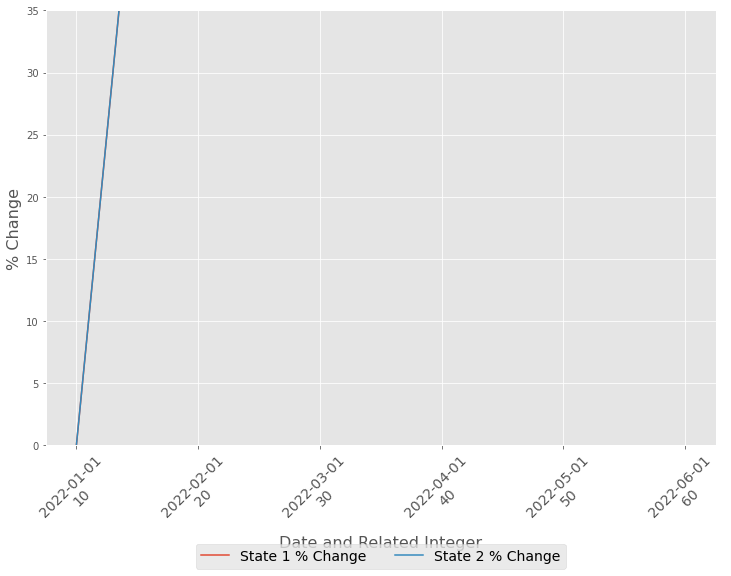

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
dates = ['2022-01-01', '2022-02-01', '2022-03-01', '2022-04-01', '2022-05-01', '2022-06-01']
related_int = [10, 20, 30, 40, 50, 60]
state1_perc = [5, 10, 15, 20, 25, 30]
state2_perc = [3, 6, 9, 12, 15, 18]

# Calculate the percentage change of each state relative to the first date
state1_change = [(x - state1_perc[0]) / state1_perc[0] * 100 for x in state1_perc]
state2_change = [(x - state2_perc[0]) / state2_perc[0] * 100 for x in state2_perc]

# Create a pandas DataFrame
df = pd.DataFrame({'Date': dates, 'Related Integer': related_int, 'State 1 % Change': state1_change, 'State 2 % Change': state2_change})
df['Date'] = pd.to_datetime(df['Date'])

# Set style to ggplot
plt.style.use('ggplot')

# Create the figure and axes objects
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the percentage changes for each state
ax.plot(df.index, df['State 1 % Change'], label='State 1 % Change')
ax.plot(df.index, df['State 2 % Change'], label='State 2 % Change')

# Set the X and Y axis labels
ax.set_xlabel('Date and Related Integer', fontsize=16)
ax.set_ylabel('% Change', fontsize=16)

# Set the X axis tick locations and labels
tick_locations = df.index
tick_labels = [f"{date}\n{related_int}" for date, related_int in zip(dates, related_int)]
plt.xticks(tick_locations, tick_labels, rotation=45, fontsize=14)

# Set the Y axis limits
ax.set_ylim(0, 35)

# Add a legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=14)

# Show the plot
plt.show()


TypeError: unsupported operand type(s) for +: 'DatetimeArray' and 'str'

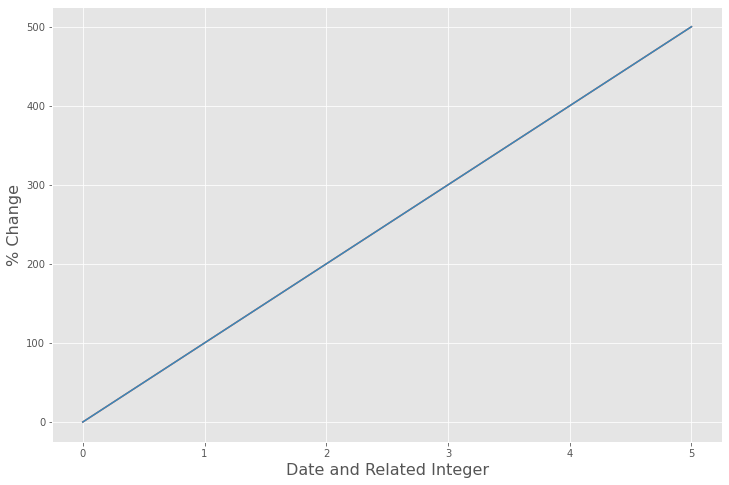

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from CSV
df = pd.read_csv('data.csv')

# Set the figure size
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the percentage changes for each state
ax.plot(df.index, df['State 1 % Change'], label='State 1 % Change')
ax.plot(df.index, df['State 2 % Change'], label='State 2 % Change')

# Set the X and Y axis labels
ax.set_xlabel('Date and Related Integer', fontsize=16)
ax.set_ylabel('% Change', fontsize=16)

# Set the X axis tick locations and labels
ax.set_xticks(df.index)
ax.set_xticklabels(df['Date'] + ' / ' + df['Related Integer'].astype(str), rotation=45, fontsize=14)

# Add a legend
ax.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3), ncol=2, fontsize=14)

# Set the plot style to ggplot
plt.style.use('ggplot')

# Show the plot
plt.show()
